In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
family_school=pd.read_csv("data_sources/Schooldata.csv")
crime=pd.read_csv("data_sources/2016_ATX_Crime_Ratings.csv")
family_housing=pd.read_csv("data_sources/Housingdata.csv")



In [3]:
family_school.head()

,Unnamed: 0,gsId,name,city,state,address,lat,lon,type,gsRating,Zipcode
0,0,25212.0,4Points Academy,Austin,TX,"5145 Ranch Road 620 North, \nAustin, TX 78732",30.389547,-97.88448,private,NaN,78732.0
1,1,11998.0,ACE Academy,Austin,TX,"3901 Shoal Creek Boulevard, \nAustin, TX 78756",30.308155,-97.74721,private,NaN,78756.0
2,2,25177.0,AESA Prep Academy,Austin,TX,"14101 Canonade, \nAustin, TX 78737",30.199083,-98.00528,private,NaN,78737.0
3,3,18793.0,AHB Community School,Austin,TX,"4001 Speedway Ave, \nAustin, TX 78751",30.303180,-97.73161,private,NaN,78751.0
4,4,25183.0,Abrome,Austin,TX,"10201 Aqua Azul Ct, \nAustin, TX 78733",30.335150,-97.87648,private,NaN,78733.0


In [202]:
school_clean=family_school[["Zipcode","gsRating"]]
school_clean=school_clean.dropna(how="any")
school_clean['ZipCode'] = school_clean['Zipcode'].astype(int)
del school_clean['Zipcode']
school_clean.rename(columns={"gsRating":"school_Rating"}, inplace=True)
school_clean.head()
school=school_clean.groupby(["ZipCode"]).mean()



In [203]:
del crime["Unnamed: 0"]
del crime["Cnt"]
crime.rename(columns={"Rating":"crime_Rating"}, inplace=True)
crime['ZipCode'] = crime['Zipcode'].astype(int)
del crime['Zipcode']
crime_clean=crime.groupby(["ZipCode"]).mean()



In [204]:
family_housing=family_housing[["Zipcode","avgsaleprice"]]

In [205]:
family_housing["avgsaleprice"] /= 100000
family_housing['ZipCode'] = family_housing['Zipcode'].astype(int)
del family_housing['Zipcode']
family_housing.rename(columns={"Zipcode":"ZipCode"}, inplace=True)
family_housing['ZipCode'] = family_housing['ZipCode'].astype(int)
housing=family_housing.groupby("ZipCode").mean()
housing.head()

,avgsaleprice
ZipCode,
78617,1.37462
78701,4.06191
78702,1.87061
78703,7.60083
78704,6.92300


In [206]:
Final_family1=pd.merge(school,crime_clean ,on="ZipCode" ,how="outer")


In [208]:
Final_family=pd.merge(Final_family1,housing , on="ZipCode" , how="outer")
Final_family.head()

,school_Rating,crime_Rating,avgsaleprice
ZipCode,,,
78617,7.000000,0.849478,1.37462
78701,5.500000,6.187779,4.06191
78702,5.444444,4.715350,1.87061
78703,4.428571,1.967213,7.60083
78704,4.230769,7.621461,6.92300


In [216]:
sort_Final_family=Final_family.sort_values(["school_Rating"], ascending=False)
sort_Final_family=sort_Final_family.dropna(how="any")
sort_Final_family.head()

,school_Rating,crime_Rating,avgsaleprice
ZipCode,,,
78732,9.333333,0.002981,3.65310
78747,9.000000,0.682563,1.99643
78737,9.000000,0.002981,3.79500
78759,8.600000,3.570790,2.56167
78741,8.000000,10.000000,1.74533


In [104]:
# Final_family["school_Rating"] *= 2
# Final_family["crime_Rating"] *= 2
# Final_family["avgsaleprice"] *= 2

In [217]:
sort_Final_family.reset_index(inplace=True)

In [218]:
sort_Final_family.head()

,ZipCode,school_Rating,crime_Rating,avgsaleprice
0,78732,9.333333,0.002981,3.65310
1,78747,9.000000,0.682563,1.99643
2,78737,9.000000,0.002981,3.79500
3,78759,8.600000,3.570790,2.56167
4,78741,8.000000,10.000000,1.74533


In [219]:
df= sort_Final_family.loc[sort_Final_family["school_Rating"]>=8]

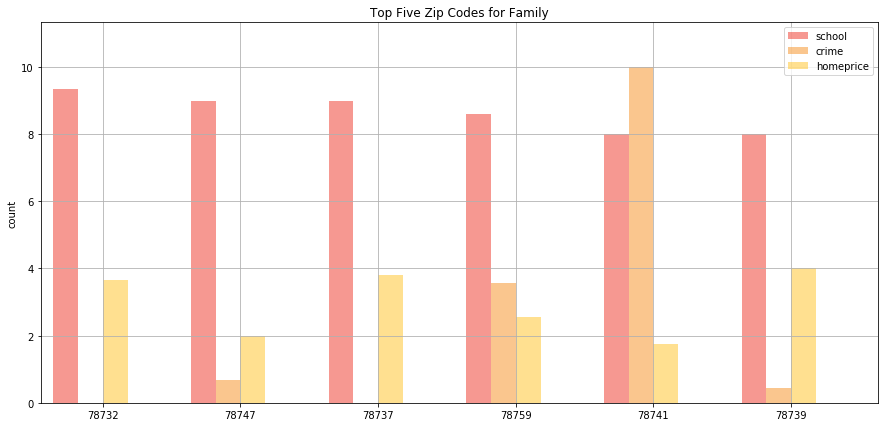

In [226]:
zipcode=[]
pos =  list(range(len(df['school_Rating']))) 
width = 0.18 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,7))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['school_Rating'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['ZipCode'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['crime_Rating'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['ZipCode'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['avgsaleprice'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df['ZipCode'][2])

# plt.bar([p + width*3 for p in pos],
#         #using df['pre_score'] data,
#         df['Apartments count'], 
#         # of width
#         width, 
#         # with alpha 0.5
#         alpha=0.5, 
#         # with color
#         color='green', 
#         # with label the first value in first_name
#         label=df['Zip Code'][3]) 
 

# Set the y axis label
ax.set_ylabel('count')

# Set the chart's title
ax.set_title('Top Five Zip Codes for Family')

# Set the position of the x ticks
ax.set_xticks([p +1.5* width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['ZipCode'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(df['school_Rating'])+2] )

# Adding the legend and showing the plot
plt.legend(['school', 'crime', 'homeprice'], loc='best')
plt.grid()
plt.show()
fig.savefig('Top Five Zip Codes for Family.png')